 # Testverfahren
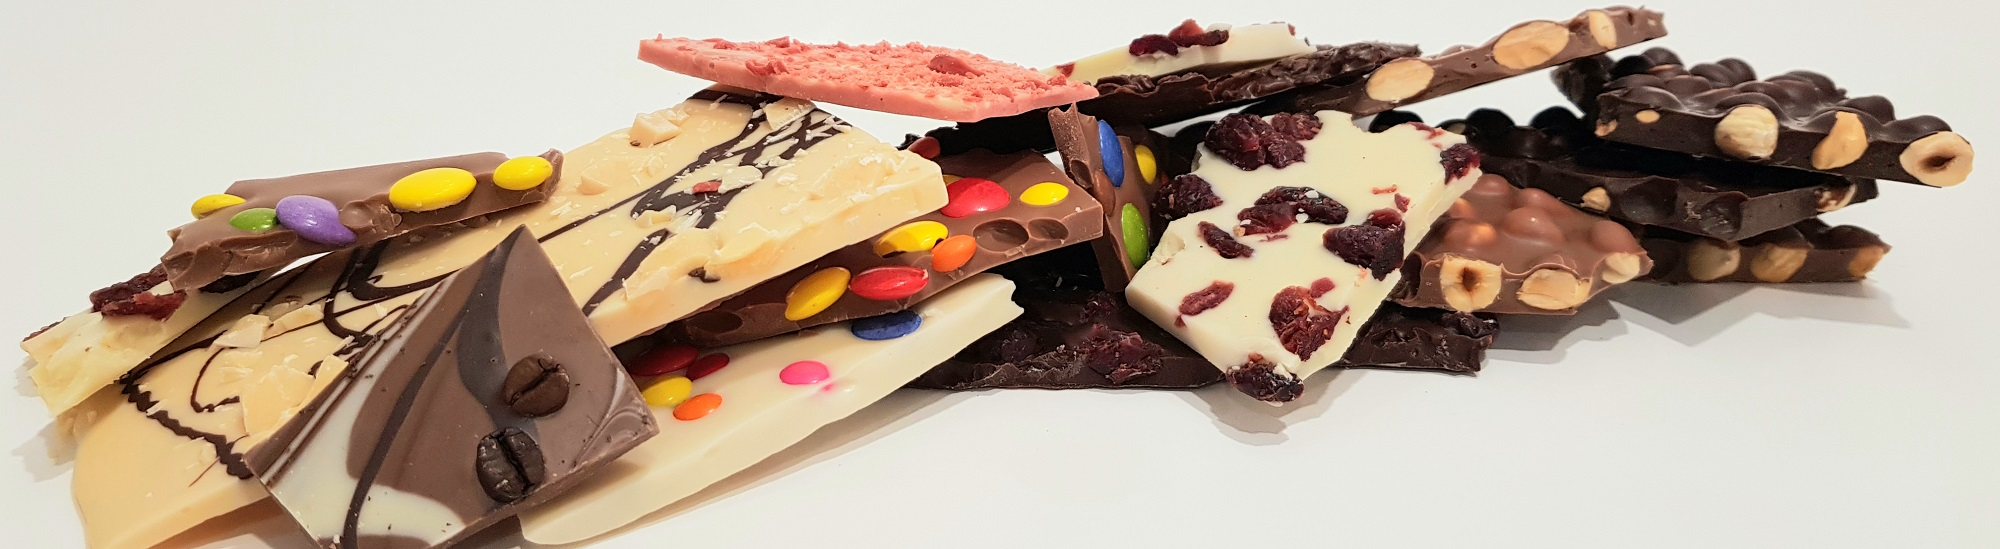
In diesem (letzten) Notebook beschäftigen wir uns mit Testverfahren, genauer gesagt dem z-Test: Getestet wird der Parameter $\mu$ der Normalverteilung bei bekannter Standardabweichung $\sigma$, genau wie in unserem *Schokotafel*-Beispiel in der Vorlesung.

Wir implementieren das Testverfahren, testen es, und wenden es auf unsere Ebay-Auto-Daten an.

# 1. Implementierung
Implementieren Sie die Methoden 

* test_bothsides(): führt einen beidseitigen Test durch ($\mathcal{H}_0: \mu = \mu_0$)
* test_leftside(): führt einen linksseitigen Test durch ($\mathcal{H}_0: \mu \geq \mu_0$)
* test_rightside(): führt einen rechtsseitigen Test durch ($\mathcal{H}_0: \mu \leq \mu_0$)

Die Methoden erhalten jeweils die Stichprobe, den behaupteten Erwartungswert, die gegebene Standardabweichung, sowie das Signifikanzniveau $\alpha$. Sie sollen jeweils True zurückgeben wenn die Hypothese *akzeptiert* wird.

*Hinweis: Im Paket [scipy.stats.norm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) kann man sich mit der Methode ppf() ein Quantil (engl. "percentile") holen.* 

In [15]:
import numpy as np
from scipy.stats import norm
from math import sqrt

def test_wo_sigma(x, mu0, alpha, seite):
    '''
    @param x:                        Die Stichprobe (ein Numpy-Array mit Länge n)
    @param x, mu0, alpha, seite: siehe test(...)
    '''
    n = x.size
    x_bar = np.mean(x)
    sigma = sqrt(1/(n-1) * sum((x - x_bar)**2))
    return test(x, mu0, sigma, alpha, seite)

def test(x, mu0, sigma, alpha, seite):
    '''
    @param x:                        Die Stichprobe (ein Numpy-Array mit Länge n)
    @param mu0, sigma, alpha, seite: siehe test_precalced()
    '''
    # Mittelwert berechnen
    x_bar = np.mean(x)
    n = x.size
    return test_precalced(x_bar, n, mu0, sigma, alpha, seite)

def test_precalced(x_bar, n, mu0, sigma, alpha, seite):
    '''
    @param x_bar: Mittelwert dert Stichprobe
    @param n:     Länge der Stichprobe
    @param mu0:   Der behauptete Erwartungswert, der geprüft wird.
    @param sigma: Die Standardabweichung (als fest angenommen)
    @param alpha: Das Signifikanzniveau
    @param seite: -1 = Linksseitig, 0 = Beidseitig, 1 = Rechtsseitig
    '''
    U = (x_bar - mu0)/(sigma/sqrt((n)))
    
    if(seite == -1): return (U >=  norm.ppf(  alpha) ) # rechts
    if(seite ==  0): return (U >= -norm.ppf(1-alpha/2) and U <= norm.ppf(1-alpha/2)) # mitte
    if(seite ==  1): return (U <=  norm.ppf(1-alpha) ) # links
            

def test_bothsides(x, mu0, sigma, alpha):
    return test(x, mu0, sigma, alpha, 0)
    
def test_leftside(x, mu0, sigma, alpha):
    return test(x, mu0, sigma, alpha, -1)

def test_rightside(x, mu0, sigma, alpha):
    return test(x, mu0, sigma, alpha,  1)
    


# 2. Test
Testen Sie nun Ihre Methode, indem Sie das [Schokotafel-Beispiel aus der Vorlesung](https://video.cs.hs-rm.de/course/47/lecture/339/?time=1696.005738) nachbauen. Erstellen Sie hierzu selbst eine Dummy-Stichprobe mit $10$ Elementen und Mittelwert $98,9$.

Führen Sie nun wie im Vorlesungsvideo einen linksseitigen, rechtsseitigen und beidseitigen Test für den Mittelwert $\mu_0=100, \alpha=0.05$ und $\sigma=2$ durch. Überrascht Sie eines der Ergebnisse?

In [19]:
for s in [-1, 0, 1]:
    print(test_precalced(98.9, 10, 100, 2, 0.05, s))

False
True
True


# 3. Auto-Daten
Wir laden nun die wohlbekannten Ebay-Auto-Daten (einfach die nächste Zelle ausführen)...

In [3]:
import pandas

# Anmerkung: Man kann die Datei auch in Excel/Libreoffice öffnen.
cars = pandas.read_csv('cars.csv')

# Wir geben die Namen der Spalten/Merkmale aus.
columns = cars.columns
for i,col in enumerate(columns):
    print('%.2d : %s' %(i,col))
    
# Wir konvertieren die Daten in ein Numpy-Array.
data = cars.values.astype('float')

00 : dollar_price
01 : registration_year
02 : power_ps
03 : kilometer
04 : postal_code
05 : type__bus
06 : type__cabrio
07 : type__coupe
08 : type__kleinwagen
09 : type__kombi
10 : type__limousine
11 : type__suv
12 : gearbox__automatik
13 : gearbox__manuell
14 : fuel__benzin
15 : fuel__diesel
16 : brand__alfa_romeo
17 : brand__audi
18 : brand__bmw
19 : brand__chevrolet
20 : brand__chrysler
21 : brand__citroen
22 : brand__dacia
23 : brand__daewoo
24 : brand__daihatsu
25 : brand__fiat
26 : brand__ford
27 : brand__honda
28 : brand__hyundai
29 : brand__jaguar
30 : brand__jeep
31 : brand__kia
32 : brand__lada
33 : brand__lancia
34 : brand__land_rover
35 : brand__mazda
36 : brand__mercedes_benz
37 : brand__mini
38 : brand__mitsubishi
39 : brand__nissan
40 : brand__opel
41 : brand__peugeot
42 : brand__porsche
43 : brand__renault
44 : brand__rover
45 : brand__saab
46 : brand__seat
47 : brand__skoda
48 : brand__smart
49 : brand__subaru
50 : brand__suzuki
51 : brand__toyota
52 : brand__trabant
5

# 4. Preis-Check
Führen Sie nun in einer Schleife für *jede* Auto-Marke X einen Preis-Test durch:
* Sammeln Sie die Preise aller Autos der Marke X.
* Nehmen Sie die ersten 10 Preise als Stichprobe. Prüfen Sie die Hypothese "Der erwartete Preis von Autos der Marke X ist mindestens 5000 Euro". Wählen Sie ein Signifikanzniveau von 10%.
* Geben Sie das Testergebnis aus.
* Geben Sie außerdem den tatsächlichen Mittelwert über *alle* Autos der Marke X aus und checken Sie somit ob der Preis *tatsächlich* über 5000 EUR liegt. Für welche Marken liegt der Test falsch?


In [54]:
# Führen Sie nun in einer Schleife für jede Auto-Marke X einen Preis-Test durch:
for X in range(16,55):
    brandCars = data[data[:,X].astype(bool)] # brand Cars = Autos von Marke X
# Sammeln Sie die Preise aller Autos der Marke X.
    pricesX = brandCars[:,0]
# Nehmen Sie die ersten 10 Preise als Stichprobe.
    stichprobe = pricesX[:10]
# Prüfen Sie die Hypothese "Der erwartete Preis von Autos der Marke X ist mindestens 5000 Euro".
# Wählen Sie ein Signifikanzniveau von 10%. -> Linksseitiger Test
    guess = test_wo_sigma(stichprobe, 5000, 0.1, -1)
# Geben Sie das Testergebnis aus.
    print("%-20s: %s" % (columns[X], ("True" if guess else "False")))
# Geben Sie außerdem den tatsächlichen Mittelwert über alle Autos der Marke X aus
    p_bar = np.mean(pricesX)
    print(" actual: %23.2f" % (p_bar))
# und checken Sie somit ob der Preis tatsächlich über 5000 EUR liegt.
    print(" test was: %16s\n" % ("Correct" if (p_bar > 5000) == guess else "False"))
# Für welche Marken liegt der Test falsch?

brand__alfa_romeo   : False
 actual:                 4673.39
 test was:          Correct

brand__audi         : True
 actual:                10297.23
 test was:          Correct

brand__bmw          : True
 actual:                 9668.11
 test was:          Correct

brand__chevrolet    : True
 actual:                 8025.29
 test was:          Correct

brand__chrysler     : True
 actual:                 4832.94
 test was:            False

brand__citroen      : True
 actual:                 4266.48
 test was:            False

brand__dacia        : True
 actual:                 5852.31
 test was:          Correct

brand__daewoo       : False
 actual:                 1067.30
 test was:          Correct

brand__daihatsu     : False
 actual:                 1903.64
 test was:          Correct

brand__fiat         : False
 actual:                 3324.64
 test was:          Correct

brand__ford         : True
 actual:                 4343.50
 test was:            False

brand__honda     